# This is a program for Files for 365 days or more

# Converting grib to netcdf
1. Download the grib archive
2. Converting the file to netcdf #For some reason I couldnt open the grib file directly in my computer using python
 2.1 Using cdo command line in the terminal to convert c
     it 
     >>>cdo  --eccodes  -f nc copy originalfile.grib newfile.n
     Note: If i don't use --eccodes, the variable names won't be saved eccodes its part of the ERA world:)

In this file using a list of coordinates, Plots for different pressure levels are made.

To look into the file: cdo -showname <infile>
            



In [77]:
import pandas as pd
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os
import netCDF4
import pandas as pd
import datetime



# Main functions

In [2]:
def GeneratingListOfVariables(file_nc):
    nc = netCDF4.Dataset(fn,'r+')
    #print(nc.variables.items())
    times = nc.variables['time']
    #print(times)
    jd = netCDF4.num2date(times[:],times.units)
    nc.close
    variables=list(nc.variables.keys())[4::]
    return nc.variables,variables


def Graphercore(i,P0,Variable):
            lat=np.array(Variable['lat'])
            lon=np.array(Variable['lon'])
            Coord1=np.where(lon==LON[i])[0][0]
            Coord2=np.where(lat==LAT[i])[0][0]
            Plev=np.where(Plevs==P0)[0][0] 
            Var=np.array(Variable[vari])
            Var=Variable[vari][:,Plev,Coord1,Coord2]
            units=Variable[vari].units
            if vari=='t':
                Var=Var-273.15
                units='°C'            
            date=Variable['time'].units.replace('hours since ','')
            jd=pd.date_range(date,periods=len(Variable['time']),freq='3H')
            hs = pd.Series(Var,index=jd) 
            return hs,units


In [3]:
fn = '/home/usuario/metview/ERA5/SameLevelPressure/2019WholeYear.nc'
nc = netCDF4.Dataset(fn)
Variables,variables=GeneratingListOfVariables(fn)
#nc.variables.keys()
nc.variables['time']
lat=np.array(Variables['lat'])
lon=np.array(Variables['lon'])
#Variables['time'].units
#Variables['t'][:]
#nc = netCDF4.Dataset(fn)
#nc.variables['t'][:]
nc.variables['time']

<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    units: hours since 2019-1-1 00:00:00
    calendar: proleptic_gregorian
    axis: T
unlimited dimensions: time
current shape = (2920,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [4]:
Variables['time'].units

'hours since 2019-1-1 00:00:00'

In [5]:
time

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 13.4 µs


In case you want to see what is inside
#nc.variables.items()

# Calculating and addinng the Angle between components into the dataset

In [6]:
U=np.where(np.array(Variables['u'][:])==0,0.000001,np.array(Variables['u'][:]))
Angulo=np.degrees(np.arctan(np.array(Variables['v'][:])/U))
Variables['Angle']=Angulo
Variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     standard_name: time
     units: hours since 2019-1-1 00:00:00
     calendar: proleptic_gregorian
     axis: T
 unlimited dimensions: time
 current shape = (2920,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lon': <class 'netCDF4._netCDF4.Variable'>
 float64 lon(lon)
     standard_name: longitude
     long_name: longitude
     units: degrees_east
     axis: X
 unlimited dimensions: 
 current shape = (33,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat': <class 'netCDF4._netCDF4.Variable'>
 float64 lat(lat)
     standard_name: latitude
     long_name: latitude
     units: degrees_north
     axis: Y
 unlimited dimensions: 
 current shape = (41,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'plev': <class 'netCDF4._netCDF4.Variable'>
 float64 plev(plev)
     standard_name: air_pressure
     long_name: pressure
     units: Pa
     positive: down
     axis: Z
 u

# Creating Folders 

In [7]:
#creating Folders for graphs
cn=os.path.basename(fn)
path=os.getcwd()
path
directory=path+'/graphs/'+cn+'/'
directory1=path+'/graphs/'+'/'+cn+'/byPressure/'
directory2=path+'/graphs/'+'/'+cn+'/byCoordinates/'
directories=[directory1,directory2]
for i in directories:
    try:
        os.makedirs(i)
    except OSError:
        print ("Creation of the directory %s failed" % i)
    else:
        print ("Successfully created the directory %s " % i)
directory1    

Creation of the directory /home/usuario/Desktop/All/Tesis/DATA/eventos/20190720/graphs//2019WholeYear.nc/byPressure/ failed
Creation of the directory /home/usuario/Desktop/All/Tesis/DATA/eventos/20190720/graphs//2019WholeYear.nc/byCoordinates/ failed


'/home/usuario/Desktop/All/Tesis/DATA/eventos/20190720/graphs//2019WholeYear.nc/byPressure/'

# Reading Coordinates

In [8]:
#the first 4 are lon,lat,t,pressure levels
coordinates=pd.read_csv('coordinatesOneSideToOthertotheMountain.csv')
LON=coordinates['longitude'].values.tolist()
LAT=coordinates['latitude'].values.tolist()
Plevs=np.array(Variables['plev'])
#variables=['t','r']
len(LON)
Plevs
Variables['v'][:]

masked_array(
  data=[[[[ 8.91613770e+00,  8.56066895e+00,  8.17395020e+00, ...,
           -5.16589355e+00, -5.71276855e+00, -6.13464355e+00],
          [ 9.79113770e+00,  9.50207520e+00,  9.18566895e+00, ...,
           -3.98229980e+00, -4.52136230e+00, -4.84948730e+00],
          [ 1.06817627e+01,  1.04161377e+01,  1.01505127e+01, ...,
           -2.81042480e+00, -3.14636230e+00, -3.35729980e+00],
          ...,
          [ 2.50411377e+01,  2.42677002e+01,  2.31895752e+01, ...,
            2.42004395e+00,  1.85363770e+00,  1.31848145e+00],
          [ 2.49630127e+01,  2.38575439e+01,  2.24161377e+01, ...,
            2.19348145e+00,  1.59191895e+00,  1.02160645e+00],
          [ 2.45137939e+01,  2.34395752e+01,  2.19591064e+01, ...,
            1.83410645e+00,  1.24816895e+00,  7.01293945e-01]],

         [[ 3.30760193e+00,  3.51658630e+00,  3.76853943e+00, ...,
            3.46971130e+00,  3.54783630e+00,  3.83299255e+00],
          [ 3.88182068e+00,  4.04002380e+00,  4.21385193e+0

# Plotting Variable vs time for different pressure levels

# Plotting Different Variables for the same coordinate  P=P0






# SECOND PART

# Foehn Identification Algorithm

# This part is additional and is about the Foehn identification algorithm
Plotting temperature differences for 2 points when the event took place and for the whole year



# temperature at P0 at a coordinate and temperature at another

![cartacoordinates.png](attachment:cartacoordinates.png)


#temperature at P0 at a corrdinate and temperature at another

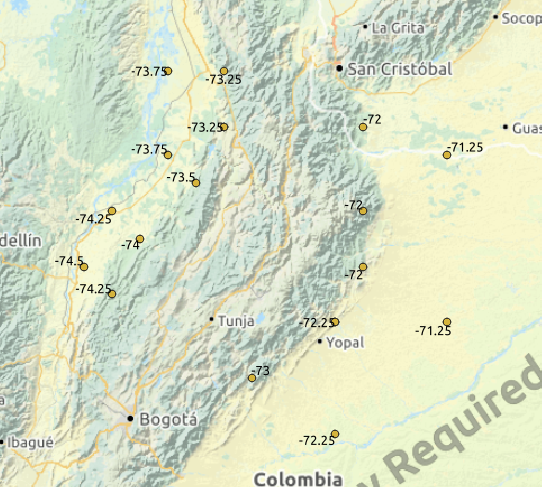


# GRAPHING VARIABLES AND DIFFERENCES EVERY  4 COORDINATES 

-73.75 7.5
-73.25 7.25
-72.0 6.5
-71.25 6.0
-73.75 7.5
-73.25 7.25
-72.0 6.5
-71.25 6.0
-73.75 7.5
-73.25 7.25
-72.0 6.5
-71.25 6.0
-73.75 7.5
-73.25 7.25
-72.0 6.5
-71.25 6.0


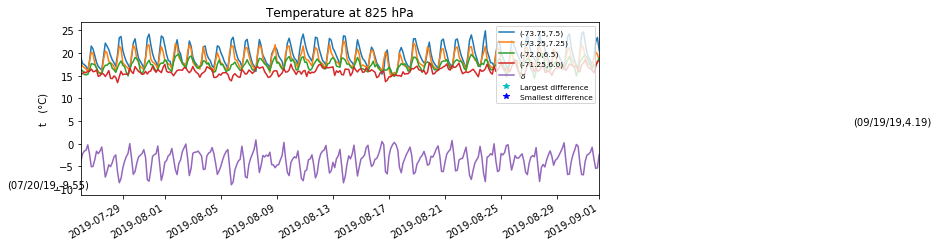

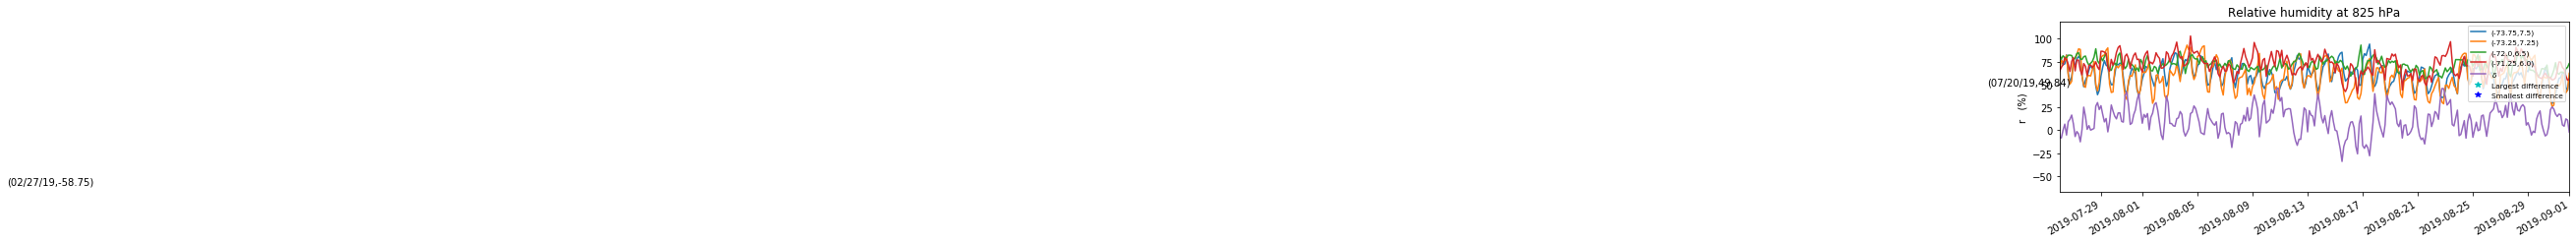

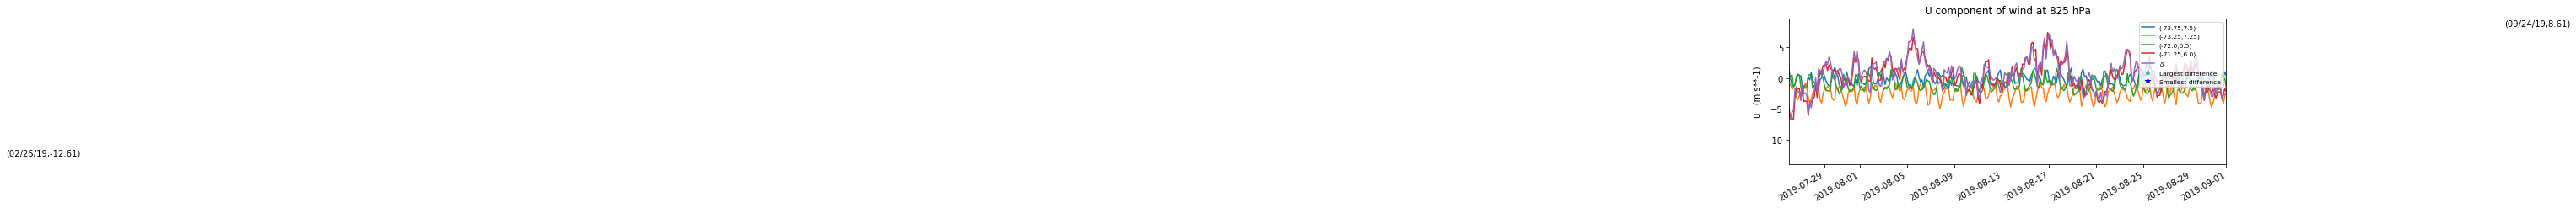

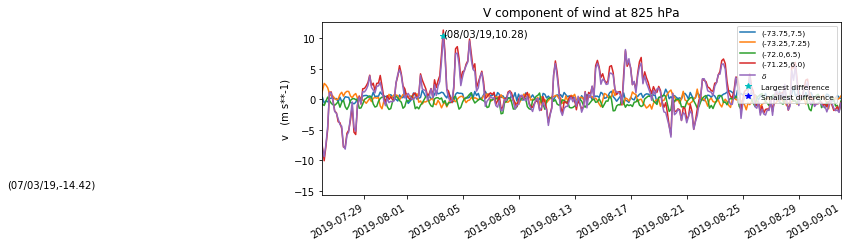

In [79]:
#Cada 4 Coordenadas
P0=82500
R=[]
variables=['t','r','u','v']
for vari in variables:
    T=[]
    fig = plt.figure(figsize=(12,4))  
    ax = fig.add_axes([0.1, 0.2, 0.6, 0.6])
    for i in range(12,16):
            #print(i,vari,len(LON))
            hss,units=Graphercore(i,P0,Variables)
            #ax = fig.add_subplot(111)
            hss.plot(ax=ax,title='%s at %s hPa' % (Variables[vari].long_name,int(P0/100)),label='(%s,%s)'%(LON[i],LAT[i]),x_compat=True)
            T.append(hss)
            R.append(hss)
            print(LON[i],LAT[i])
    DT=T[3]-T[0]
    plt.plot((DT),label=r'$\delta$')
    maxi=max(DT)
    mini=min(DT)
    plt.plot(DT[DT==maxi],'c*',label='Largest difference')
    plt.plot(DT[DT==mini],'b*',label='Smallest difference')
    ax.text(DT[DT==maxi].index,maxi, '(%s,%s)'%(DT[DT==maxi].index.strftime('%x')[0],round(maxi,2)))
    ax.text(DT[DT==mini].index[0],mini, '(%s,%s)'%(DT[DT==mini].index.strftime('%x')[0],round(mini,2)))
    fig.autofmt_xdate() 
    plt.legend(bbox_to_anchor=(1,1),fontsize=7.5,loc='upper right')                               
    ax.set_ylabel('%s   (%s)'%(vari,units))
    ax.set_xlim([datetime.date(2019, 7, 26), datetime.date(2019, 9, 1)])
    plt.savefig(directory2+vari+str(P0)+'_12-16COORD'+cn+'.png')  
       
#plt.show()            

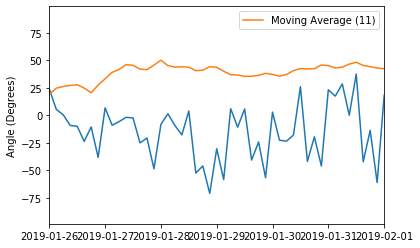

In [78]:
u1=R[11];v1=R[15];A1=np.degrees(np.arctan(v1/u1))
u2=R[10];v2=R[14];A2=np.degrees(np.arctan(v2/u2))
j=11;MA=[np.mean(A1[i:i+j-1]) for i in range(len(A1)-j)]# Moving Average each j
MAA=pd.DataFrame(MA,index=A1.index[:-j])
#plt.plot(A1)
plt.plot(A2)
plt.plot(MAA,label='Moving Average ('+str(j)+')')

plt.ylabel('Angle (Degrees)')
plt.xlim([datetime.date(2019, 1, 26), datetime.date(2019, 2, 1)])
#set_xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])
plt.legend()
plt.savefig(directory2+'Angle'+str(P0)+'_12-16COORD'+cn+'.png')


In [65]:
U=np.where(np.array(Variables['u'][:])==0,0.000001,np.array(Variables['u'][:]))
Angulo=np.degrees(np.arctan(np.array(Variables['v'][:])/U))
Variables['Angle']=Angulo

Variables
MA

[45.101425,
 44.993725,
 43.14649,
 43.292305,
 43.338535,
 41.855007,
 40.69642,
 39.978157,
 38.86039,
 35.59059,
 32.758373,
 30.073975,
 28.371511,
 25.61119,
 23.80688,
 23.040373,
 23.966444,
 25.727655,
 26.534817,
 28.52839,
 30.576176,
 34.24563,
 38.443985,
 41.33628,
 44.40276,
 46.850838,
 46.585472,
 47.13341,
 48.858955,
 49.525093,
 48.025593,
 47.85313,
 46.069115,
 45.110584,
 45.203987,
 47.854362,
 50.833294,
 52.28768,
 52.037445,
 52.87481,
 57.160664,
 45.441296,
 50.705788,
 40.14481,
 43.755028,
 29.754248,
 13.756601,
 14.678858,
 3.0781167,
 -8.195174,
 -6.837391,
 -8.9478855,
 -25.432291,
 -25.798626,
 -41.906742,
 -40.099678,
 -37.672707,
 -53.197773,
 -55.51966,
 -43.678486,
 -45.093304,
 -43.24098,
 -38.992256,
 -36.370464,
 -34.62656,
 -37.03423,
 -23.015915,
 -7.463458,
 9.385715,
 -4.780526,
 -4.6862397,
 -6.0901604,
 -11.497059,
 -2.9194636,
 7.085954,
 19.687527,
 16.243221,
 12.471614,
 9.37466,
 25.45929,
 21.52998,
 32.863472,
 45.501835,
 46.3636,

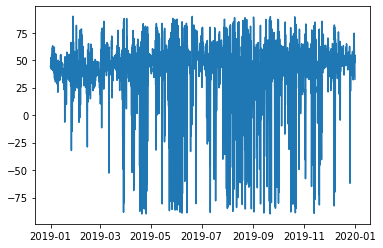

In [66]:
u1=R[11];v1=R[15];A1=np.degrees(np.arctan(v1/u1))
u2=R[10];v2=R[14];A2=np.degrees(np.arctan(v2/u2))
plt.plot(A1)

In [74]:
A2.index

2019-01-01 00:00:00    -6.574266
2019-01-01 03:00:00   -13.626095
2019-01-01 06:00:00   -14.742105
2019-01-01 09:00:00   -15.024734
2019-01-01 12:00:00   -12.197206
                         ...    
2019-12-31 09:00:00    60.959244
2019-12-31 12:00:00    36.159115
2019-12-31 15:00:00   -61.127689
2019-12-31 18:00:00   -37.119171
2019-12-31 21:00:00   -48.578068
Freq: 3H, Length: 2920, dtype: float32